In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
import mysql.connector
from mysql.connector import Error
connection = mysql.connector.connect(host='localhost',
database='university_marketplace',
user='root',
password='123456',
auth_plugin = 'mysql_native_password')



In [6]:
connection

In [7]:
#visualizing proportion of product type 
query1 = 'SELECT ProdType FROM product'
df1 = pd.read_sql_query(query1, connection)



C:\Users\Vinas Sukhadiya\AppData\Local\Temp\ipykernel_21872\3386671334.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query(query1, connection)


In [8]:
df1

,ProdType
0,Gaming
1,Gaming
2,Gaming
3,Electronic
4,Furniture
...,...
131,Gaming
132,Study
133,Household
134,Furniture


In [9]:
df1['ProdType'].unique()

array(['Gaming', 'Electronic', 'Furniture', 'Study', 'Household'],
      dtype=object)

In [10]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


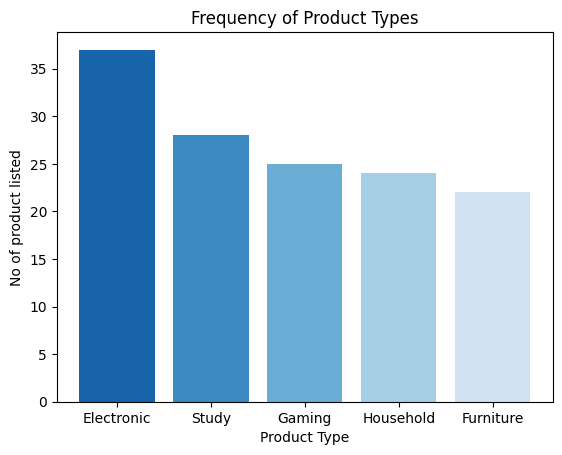

In [32]:
import numpy as np

# count the frequency of each unique value in the ProdType column
counts = df1['ProdType'].value_counts()

# create a list of colors with a gradient from dark to light
colors = plt.cm.Blues(np.linspace(0.8, 0.2, len(counts)))

# create a bar plot with the colored bars
plt.bar(counts.index, counts.values, color=colors)

# set the title and axis labels
plt.title('Frequency of Product Types')
plt.xlabel('Product Type')
plt.ylabel('No of product listed')

# display the plot
plt.show()


In [12]:
#Number of products delivered by courier company
query2 = 'SELECT CompanyName, COUNT(*) AS Order_delivered FROM courier GROUP BY CompanyName ORDER BY Order_delivered DESC'
df2 = pd.read_sql_query(query2, connection)


C:\Users\Vinas Sukhadiya\AppData\Local\Temp\ipykernel_21872\1669668601.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(query2, connection)


In [13]:
df2

,CompanyName,Order_delivered
0,USPS,12
1,FedEx,8
2,UPS,8


In [14]:
df2.columns

Index(['CompanyName', 'Order_delivered'], dtype='object')

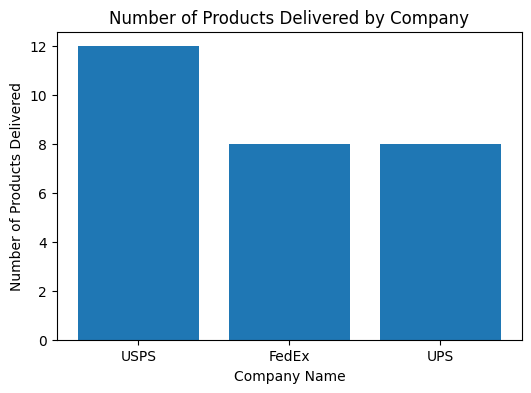

In [15]:
# set the figure size
plt.figure(figsize=(6, 4))

# create a bar chart
plt.bar(df2['CompanyName'], df2['Order_delivered'])

# set the chart title and axis labels
plt.title('Number of Products Delivered by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Products Delivered')

# display the chart
plt.show()

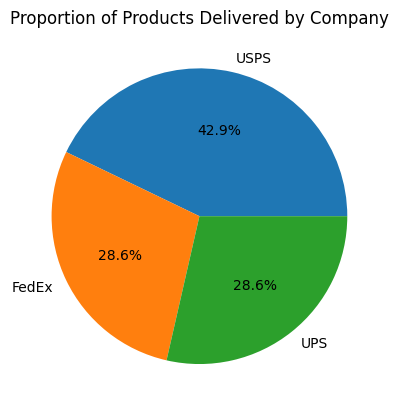

In [29]:
# create a pie chart
plt.pie(df2['Order_delivered'], labels=df2['CompanyName'], autopct='%1.1f%%')

# set the chart title
plt.title('Proportion of Products Delivered by Company')

# display the chart
plt.show()



In [21]:
#User's name who are both buyer and seller
query3 = 'SELECT FirstName, LastName FROM user WHERE UserID in (SELECT SellerID FROM seller) AND UserID in (SELECT BuyerID FROM buyer)'
df3 = pd.read_sql_query(query3, connection)

C:\Users\Vinas Sukhadiya\AppData\Local\Temp\ipykernel_21872\2367205168.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(query3, connection)


In [22]:
df3

,FirstName,LastName
0,Bernie,Nolda
1,Alma,Huguet
2,Gayle,Caramuscia
3,Tami,Yemm
4,Sollie,Lorain
5,Abbe,Bette
6,Tierney,Airton
7,Tamarra,Torre
8,Titos,Hatherleigh
9,Lauree,Zoren


In [23]:
#University which have most buyers
query4 = 'SELECT u.UniName, COUNT(b.BuyerID) AS No_Of_Buyers FROM university u JOIN buyer b ON u.UniID = b.BUniID GROUP BY u.UniName ORDER BY No_Of_Buyers DESC LIMIT 1'
df4 = pd.read_sql_query(query4, connection)

C:\Users\Vinas Sukhadiya\AppData\Local\Temp\ipykernel_21872\2579826594.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql_query(query4, connection)


In [24]:
df4

,UniName,No_Of_Buyers
0,UniversitÃ© FranÃ§aise d'Ã‰gypte,5


In [25]:
#List seller name in desending order of most no of product selling
query5 = 'SELECT U.FirstName, U.LastName, COUNT(P.ProdNo) as num_products FROM user U JOIN product P ON U.userID = P.SellerID GROUP BY U.UserID ORDER BY num_products DESC'
df5 = pd.read_sql_query(query5, connection)

C:\Users\Vinas Sukhadiya\AppData\Local\Temp\ipykernel_21872\753796625.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql_query(query5, connection)


In [26]:
df5

,FirstName,LastName,num_products
0,Crissie,Beeck,2
1,Pollyanna,Tutin,2
2,Alfreda,Pabel,2
3,Allys,Odell,2
4,Bevon,Hoodless,2
...,...,...,...
72,Morganne,Dobble,1
73,Jock,Girth,1
74,Martino,Dunphie,1
75,Huey,Setterington,1
